In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import natural_earth
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from cartopy.io import shapereader

In [7]:
data_csv = "global-hunger-index.csv"
year = 2021
column = "Global Hunger Index (2021)"
title = "Global Hunger Index (2021)"
map_filename = "ghi_map_2021.png"

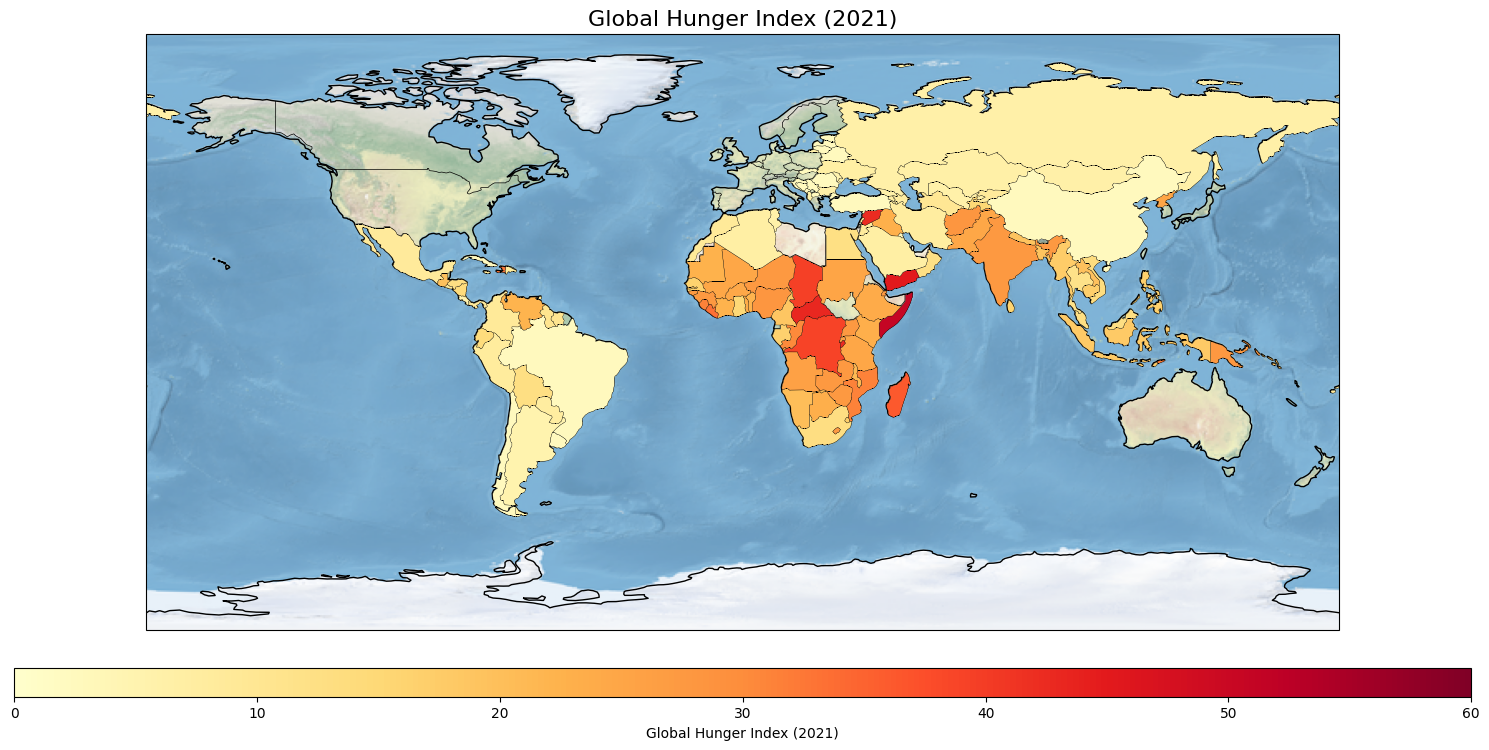

In [8]:
# Load your CSV (replace path if needed)
df = pd.read_csv(data_csv)

# Filter for 2021 only
df_2021 = df[df['Year'] == year].copy()

# Clean up weird values if needed (optional, handle missing GHI as NaN)
df_2021[column] = pd.to_numeric(df_2021[column], errors='coerce')

# Build a dictionary mapping country ISO codes to GHI
ghi_map = dict(zip(df_2021['Code'], df_2021[column]))

# Set up color normalization
norm = mcolors.Normalize(vmin=0, vmax=60)
cmap = plt.colormaps['YlOrRd']

# Setup the map
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title(title, fontsize=16)
ax.stock_img()  # Adds Blue Marble

from cartopy.io import shapereader

# Get Natural Earth shapefile path (countries, 110m resolution)
shpfilename = shapereader.natural_earth(
    resolution='110m',
    category='cultural',
    name='admin_0_countries'
)

# Read country geometries and draw them
reader = shapereader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    iso_a3 = country.attributes.get('ADM0_A3')
    ghi = ghi_map.get(iso_a3)
    if ghi is not None:
        color = cmap(norm(ghi))
        ax.add_geometries(
            [country.geometry],
            crs=ccrs.PlateCarree(),
            facecolor=color,
            edgecolor='black',
            linewidth=0.2
        )


# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50)

cbar.set_label(title)

plt.tight_layout()
plt.savefig(map_filename, dpi=300)
plt.show()